### 1.탠서플로우 기초

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r"C:\Users\LG\Documents\Deep_learning\cs231n\assignment2")
%matplotlib inline

In [4]:
# constant는 상수, Variable 은 변수 (ex weight) , placeholder 는 입력값 (ex X)

# 그래프 그리기
a = tf.Variable(1, dtype = tf.float64)
b = tf.Variable(2, dtype = tf.float64)
x = tf.placeholder(dtype = tf.float64)
y = tf.placeholder(dtype = tf.float64)
linear = a*x + b

loss1 = tf.square(y-linear)
loss = tf.reduce_sum(loss1)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

x_train = [1,2,3,4]
y_train = [0,0,0,0]

# 실행하기 (각 노드별로 ex da, db는 loss라는 함수의 Variable a, b의 gradient인 노드 
# sess.run([da,db], {x : 2,y : 0}) 은 위 두 노드를 활성화하는 것. variable은 initialize로 초기값으로 설정되어있고 입력값을 입력해주어야
# 그 지점에서의 node를 계산한다. 

with tf.Session() as sess :
    tf.global_variables_initializer().run()
    da, db = tf.gradients(loss, [a,b])
    print(sess.run([da, db], {x : 2, y : 0}))
    for i in range(10):
        print(sess.run([a,b,loss],{x:x_train,y:y_train}))
        sess.run(train,{x:x_train,y:y_train})


[16.0, 8.0]
[1.0, 2.0, 86.0]
[2.2351741790771484e-08, 1.640000008046627, 10.758400838708896]
[-0.32799998533725705, 1.5088000058650972, 2.43570194621919]
[-0.4329599929618832, 1.4536960036950113, 1.4887147192318073]
[-0.46392319723167397, 1.4239923226557161, 1.3552971046234983]
[-0.47036774327976599, 1.402857576761992, 1.3122328897679232]
[-0.46871861270116572, 1.3847025196827829, 1.2798015282481003]
[-0.46442794911292667, 1.3676700410290989, 1.2492011176645912]
[-0.45930518796549308, 1.3511420279387862, 1.2194459272006168]
[-0.45395048089364148, 1.3349117036595579, 1.1904120028399734]


In [8]:
import numpy as np

tf.reset_default_graph()

with tf.variable_scope("foo", reuse = False) :
    b = tf.get_variable("b", [10], dtype = tf.float32)
    
with tf.variable_scope("foo", reuse = True) :
    b = tf.get_variable("b", dtype = tf.float32)    
    
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
a = np.array(b.eval())
print(np.histogram(a, bins = np.linspace(-2,2,20)))
sess.close()

(array([0, 0, 0, 0, 0, 0, 0, 0, 2, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), array([-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
       -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
        0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
        1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ]))


### 그래프 그리기 및 함수 안에서 변수 정의

In [27]:
# 함수 안에 변수가 입력되어 사용하지 못하여도 graph에는 그려진다!!!
# 이게 좀 희안한게 함수안에서 변수를 설정해도 그래프상에는 남아서 변수가 존재하긴하는데 사용을 못함 ex) run이 안됨

import tensorflow as tf
import numpy as np

tf.reset_default_graph()

def f():
    init = tf.constant_initializer(1.0)
    a = tf.get_variable(name= 'a', shape = [2,2], dtype = tf.float32, initializer = init)
    b = tf.nn.softmax(a)
    c = tf.reduce_sum(a)
    return c

c = f()
#d = a    #에러가 안뜬다...

# summary할 값을 설정하고 이를 summary.merge로 객체를 생성 (scalar는 실수 histogram 은 행렬)
c_summary = tf.summary.scalar('c',c)
c_merged = tf.summary.merge([c_summary])

with tf.Session() as sess :
    tf.global_variables_initializer().run()

    #summary writer
    writer = tf.summary.FileWriter("./tensorflow/new/ex_sum3", sess.graph)
    
    # merged 객체 실행 후 writer에 입력
    summary = sess.run(c_merged)
    writer.add_summary(summary, global_step = 1)


## tf.train

1. opimizer
<br>    1) tf.train.AdamOptimizer(learning_rate = 1e-3, beta1, beta2, epsilon)
<br>    2) tf.train.RMSPropOptimizer(learning_rate, decay, momentum, epsilon)
<br>    *learning rate만 입력해주면 됨. 다른것은 설정되어있음.(변경해서 테스트 가능)
<br>    
2. learning rate decay
<br>    tf.train.exponential_decay(learning_rate, global_step, decay_steps, decay_rate, staircase = False)
<br>    output = learning_rate*decay_rate^(global_step/decay_steps)
<br>    staircase True => 위 지수가 정수로 표현됨
   

### tf.nn
1. tf.nn.conv2d(input, filter, strides, padding)
<br>   input = [N,H,W,C] 
<br>   filter = [h,w,C,F]
<br>   strides = [1,s,s,1]
<br>   padding = 'SAME' or 'VALID' (SAME이 입력, 출력 크기를 같게 유지)
   
2. tf.nn.batchnormalization & tf.nn.batch_norm_with_global_normalization(t,m,v,beta,gamma,variance_epsilon, scale_after_normalization)
<br>    t : input 4D
<br>    m, v = tf.nn.moments(x, axes=[0,1,2])
<br>    beta(initialize with 0), gamma(1) = filter size tensor
<br>    scale_after_normalization = True

    tf.contrib.layers.batch_norm is better!!!
    

2. tf.nn.relu(input) usually input =  conv_output + bias

3. tf.nn.maxpool(value, ksize, strides, padding)
<br>   value = input
<br>   ksize = window size [1,2,2,1]
<br>   strides = usually [1,2,2,1]
<br>   padding 위와 같음

4. tf.nn.dropout(x, keep_prob)
<br>   output is multiplied by 1/keep_prob

5. fully connected 는 matmul을 이용 tf.matmul(input, W) + bias
<br>   tf.contrib.layers.fully_connected 의 경우 input과 num_output을 입력해주면 weights와 biases를 생성
<br>   초기 init은 각각 xavier, zero, activation_fn은 tf.nn.relu가 default, normalizer_fn, normalizer_params를 입력해주면 
<br>   ex)tf.contrib.layers.batch_norm, normalizer_params = {'scale' = True} 하면 batch를 하고 activation fn사용

6. tf.nn.conv2d_transpose(value, filter, output_shape, strides, padding)
<br>   그냥 conv를 행렬로 표현하여 연산가능한데 이를 transpose한 연산을 적용해주는 것이라 생각하면 된다.
<br>   conv2d(output,filter, stride, padding)을 넣어준것을 반대로 해주는 것. 변수는 그대로 입력하여주면 된다.
    


1. tf.nn.softmax(logits)
<br>    logits : 2차원 행렬 dtype = float32 or 64
<br>    output = scores
    
2. tf.nn.softmax_cross_entropy_with_logits(labels, logits)
<br>    labels : class probability matrix
<br>    (tip : use tf.one_hot(indices, depth) indices : labels, depth : num_classes
    


## 2.MNIST 다루기 (데이터 로드 후 conv net으로 classification)
2-1. 데이터는 lecun homepage에서 다운

In [14]:
import data_mnist

X_train, y_train, X_test, y_test = data_mnist.mnist()

X_train_data = np.array(X_train)
y_train_label = np.array(y_train)
X_test_data = np.array(X_test)
y_test_label = np.array(y_test)

print(X_train_data.shape)
print(y_train_label.shape)
print(X_test_data.shape)
print(y_test_label.shape)

60000 train set is done
10000 test set is done
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


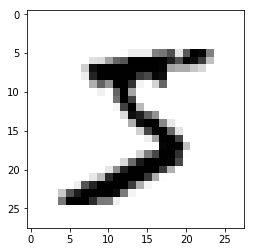

In [185]:
plt.imshow(X_train_data[0], cmap = cm.binary)
plt.show()

### 2-2. train conv net
in window I should use tensorboard --logdir=E:\Users\LG\Documents\CNN\assignment2\tensorflow\new\ex1

In [19]:
# should reset the graph
tf.reset_default_graph()

# reshape data set
N = X_train_data.shape[0]
X_train = X_train_data[:,:,:,np.newaxis]
y_train = np.zeros((N,10))
y_train[range(N),y_train_label] = 1
M = X_test_data.shape[0]
X_test = X_test_data[:,:,:,np.newaxis]
y_test = np.zeros((M,10))
y_test[range(M),y_test_label] = 1

# set placeholders 
x = tf.placeholder(tf.float32, shape=[None, 28,28,1])
y = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)
reg = tf.placeholder(tf.float32)

global_step = tf.Variable(0, trainable = 'False', name= 'global_step')

# for simplication define variable func
def weight_variable(shape, name, weight_power = 0.1):
    return tf.Variable(tf.truncated_normal(shape, dtype = tf.float32, stddev = weight_power), name = name)
def bias_variable(shape, name, bias = 0.1) :
    return tf.Variable(tf.constant(bias, shape = shape), dtype = tf.float32, name = name)

# choose mini batch
def make_batch(x, y, batch_size) :
    N = x.shape[0]
    a = np.random.choice(N, batch_size)
    return x[a], y[a]

# set neural net
x1 = tf.reshape(x,[-1,28,28,1])

with tf.name_scope('conv1') :   # conv batch relu pool
    W_conv1 = weight_variable([5,5,1,32],'W1')
    b_conv1 = bias_variable([32], 'b1')

    out = tf.nn.conv2d(x1,W_conv1, strides = [1,1,1,1], padding = 'SAME') + b_conv1

    gamma1 = tf.Variable(tf.ones([32]),dtype = tf.float32, name = 'gamma1')
    beta1 = tf.Variable(tf.zeros([32]),dtype = tf.float32, name = 'beta')
    
    mean1, var1 = tf.nn.moments(out, axes = [0,1,2])
    out = tf.nn.batch_norm_with_global_normalization(out, mean1, var1, beta1, gamma1, 1e-5, True)
    
    h_conv1 = tf.nn.relu(out)
    h_pool1 = tf.nn.max_pool(h_conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    W1_hist = tf.summary.histogram('W1', W_conv1)
    b1_hist = tf.summary.histogram('b1', b_conv1)
    var_merged = tf.summary.merge([W1_hist, b1_hist])

with tf.name_scope('conv2') :   # conv batch relu pool
    W_conv2 = weight_variable([5,5,32,64], 'b2')
    b_conv2 = bias_variable([64], 'b2')
    
    out2 = tf.nn.conv2d(h_pool1,W_conv2, strides = [1,1,1,1], padding = 'SAME') + b_conv2

    gamma2 = tf.Variable(tf.ones([64]),dtype = tf.float32, name = 'gamma2')
    beta2 = tf.Variable(tf.zeros([64]),dtype = tf.float32, name = 'beta2')
    
    mean2, var2 = tf.nn.moments(out2, axes = [0,1,2])
    out2 = tf.nn.batch_norm_with_global_normalization(out2, mean2, var2, beta2, gamma2, 1e-5, True)
    
    h_conv2 = tf.nn.relu(out2)
    h_pool2 = tf.nn.max_pool(h_conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
with tf.name_scope('fc1') :    # fc relu drop(selective) fc
    W_fc1 = weight_variable([7*7*64,1024], 'W3')
    b_fc1 = bias_variable([1024], 'b3')

    h_pool2_flat = tf.reshape(h_pool2,[-1,7*7*64])

    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1)+b_fc1)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

with tf.name_scope('output') :    
    W_fc2 = weight_variable([1024,10], 'W4')
    b_fc2 = bias_variable([10], 'b4')
    y_out = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    
# create loss node
reg_loss = tf
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = y_out))

loss_hist = tf.summary.scalar('loss',loss)
loss_merged = tf.summary.merge([loss_hist])

# create optimizer and attatch to loss 
optimizer = tf.train.AdamOptimizer(5e-4)
train_step = optimizer.minimize(loss, global_step = global_step)

# create accuracy node
correct_prediction = tf.equal(tf.argmax(y_out,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype = tf.float32))

train_acc_hist = tf.summary.scalar('train_accuracy',accuracy)
train_acc_merged = tf.summary.merge([train_acc_hist])
test_acc_hist = tf.summary.scalar('test_accuracy',accuracy)
test_acc_merged = tf.summary.merge([test_acc_hist])

# if need let's save the model
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # make writer object
    writer = tf.summary.FileWriter("./tensorflow/new/exBN2", sess.graph)
    
    for i in range(1000) :
        batch = make_batch(X_train, y_train, 200)
        
        #each 10 iter calculate accuracy and write at tensorboard with W1, b1
        if i % 50 ==0 :
            train_acc = accuracy.eval(feed_dict = {x : batch[0], y:batch[1], keep_prob : 1.0})
            
            summary = sess.run(train_acc_merged, feed_dict = {x : batch[0], y:batch[1], keep_prob : 1.0})
            writer.add_summary(summary, global_step=sess.run(global_step))
            summary = sess.run(test_acc_merged, feed_dict = {x : X_test, y: y_test, keep_prob : 1.0})
            writer.add_summary(summary, global_step=sess.run(global_step))
            
            summary = sess.run(var_merged)
            writer.add_summary(summary, global_step=sess.run(global_step))
            
            print("%d / 1000 iter accuracy = %g"%(i,train_acc))
            
        # write loss     
        summary = sess.run(loss_merged,feed_dict = {x : batch[0], y:batch[1], keep_prob : 1.0})
        writer.add_summary(summary, global_step=sess.run(global_step))
        
        # run a opimizer and update once
        train_step.run(feed_dict = {x : batch[0], y:batch[1], keep_prob : 1.0})
        
    test_acc = accuracy.eval(feed_dict = {x : X_test, y: y_test, keep_prob : 1.0})
    print("test accuracy = %g"%test_acc)  
    


0 / 1000 iter accuracy = 0.095
50 / 1000 iter accuracy = 0.89
100 / 1000 iter accuracy = 0.93
150 / 1000 iter accuracy = 0.96
200 / 1000 iter accuracy = 0.965
250 / 1000 iter accuracy = 0.985
300 / 1000 iter accuracy = 0.97
350 / 1000 iter accuracy = 0.96
400 / 1000 iter accuracy = 0.98
450 / 1000 iter accuracy = 0.97
500 / 1000 iter accuracy = 0.985
550 / 1000 iter accuracy = 0.995
600 / 1000 iter accuracy = 0.985
650 / 1000 iter accuracy = 0.97
700 / 1000 iter accuracy = 0.985
750 / 1000 iter accuracy = 0.99
800 / 1000 iter accuracy = 0.99
850 / 1000 iter accuracy = 1
900 / 1000 iter accuracy = 0.985
950 / 1000 iter accuracy = 0.99
test accuracy = 0.9768


## 3. Variable
1) variable_scope
2) get variables

In [37]:
tf.reset_default_graph()

with tf.variable_scope('conv1') as v:
    a = tf.get_variable('a', (2,2), initializer = tf.constant_initializer(1))
    print("a name : ", a.name)
    v.reuse_variables() # or tf.get_variable_scope() == v
    with tf.variable_scope(v):
        b = tf.get_variable('a', (2,2), initializer = tf.constant_initializer(2))
        print("b name: ", b.name)
with tf.variable_scope('bias') as l :
    c = tf.get_variable('bias', [1], initializer = tf.random_normal_initializer(), trainable = False)

loss = tf.reduce_mean(a)

op = tf.train.AdamOptimizer(learning_rate = 1e-3)
train_step = op.minimize(loss)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
print(sess.run((a,b)))
print("global _variable :",[v.name for v in tf.global_variables()])
print("trainable_variable :",[v.name for v in tf.trainable_variables()])
print("scope bias variable :", tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'conv1'))
print(tf.get_collection(tf.GraphKeys.UPDATE_OPS, 'conv1'))
sess.close()

a name :  conv1/a:0
b name:  conv1/a:0
(array([[ 1.,  1.],
       [ 1.,  1.]], dtype=float32), array([[ 1.,  1.],
       [ 1.,  1.]], dtype=float32))
global _variable : ['conv1/a:0', 'bias/bias:0', 'beta1_power:0', 'beta2_power:0', 'conv1/a/Adam:0', 'conv1/a/Adam_1:0']
trainable_variable : ['conv1/a:0']
scope bias variable : [<tf.Variable 'conv1/a:0' shape=(2, 2) dtype=float32_ref>]
[]


In [45]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()
a = np.random.randn(2,2)
b = tf.convert_to_tensor(a)
c = tf.get_variable('c',[1])
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
print(sess.run([b, c]))
sess.close()

[array([[-0.53314279,  0.0383955 ],
       [-1.55440473, -0.8199383 ]]), array([-1.11786687], dtype=float32)]


## 4. save and retrieve

In [46]:
tf.reset_default_graph()

def add(x):
    with tf.variable_scope("conv"):
        a = tf.get_variable('a',[2,2])
    mean, var = tf.nn.moments(a,axes=[0,1])
    return mean+x, var

b = add(1)
    
saver = tf.train.Saver()

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    a1 = tf.trainable_variables()[0]
    print(sess.run(a1))
    print(sess.run(b))
    save_path = saver.save(sess, r"C:\Users\LG\Documents\Deep_learning\cs231n\assignment2\tensorflow\save\save_ex.ckpt")
    print("model saved in file %s"%save_path)
    

[[-0.0706867   0.53510869]
 [ 0.80864751 -0.54257667]]
(1.1826231, 0.27655828)
model saved in file C:\Users\LG\Documents\Deep_learning\cs231n\assignment2\tensorflow\save\save_ex.ckpt


In [10]:
tf.reset_default_graph()

with tf.variable_scope("conv", reuse=False):
    a = tf.get_variable('a',[2,2])

# variable share
with tf.variable_scope("conv", reuse=True):
    b = tf.get_variable('a',[2,2])+1

saver = tf.train.Saver()

# only variable name is important
with tf.Session() as sess:
    saver.restore(sess, r"C:\Users\LG\Documents\Deep_learning\cs231n\assignment2\tensorflow\save\save_ex.ckpt")
    print("model retored")
    print(sess.run([a,b]))
    

INFO:tensorflow:Restoring parameters from C:\Users\LG\Documents\Deep_learning\cs231n\assignment2\tensorflow\save\save_ex.ckpt
model retored
[array([[-0.0706867 ,  0.53510869],
       [ 0.80864751, -0.54257667]], dtype=float32), array([[ 0.9293133 ,  1.53510869],
       [ 1.80864751,  0.45742333]], dtype=float32)]


In [87]:
a = tf.constant([3,3])
b = tf.reduce_mean((a-1)**2)/2

with tf.Session() as sess:
    print(sess.run(b))

2.0


In [43]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

x = tf.Variable(0, dtype = tf.float32)
a = tf.assign(x, 1)
y= x+1    
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter("./tensorflow/new/ex6", sess.graph)
    sess.run(x.value())
    print(sess.run(y))

1.0


# test for complex batch norm

In [103]:
import math as m
from tensorflow.python.ops import init_ops

tf.reset_default_graph()

a= 0.9*tf.complex(1.0, 1.0)
mag= tf.abs(a)
conj= tf.conj(a)
phase= tf.atan2(tf.real(a), tf.imag(a))
c= tf.cond(0 <= phase, lambda: a, lambda: tf.complex(0.,0.))

print(tf.Variable(tf.constant(0,shape=[2,2])).get_shape()[1])

b= tf.complex(tf.constant([1.,2.]), tf.constant([2.,2.]))
s= tf.reduce_mean(b)

d= {"a":a, "b":b}

running_mean = tf.get_variable("running_mean", shape=[1, 1, 1, 10], dtype=tf.complex64,
                               trainable=False, initializer= init_ops.zeros_initializer())


with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(mag.eval(), a.eval(), conj.eval(), phase.eval())
    print(b.eval(), s.eval())
    print(d['a'].eval())
    print(running_mean.eval())
    print(tf.cast(tf.constant(1.0), tf.complex64).eval())

2
1.27279 (0.9+0.9j) (0.9-0.9j) 0.785398
[ 1.+2.j  2.+2.j] (1.5+2j)
(0.9+0.9j)
[[[[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
     0.+0.j]]]]
(1+0j)


In [247]:
from tensorflow.python.ops import init_ops
import tensorflow as tf
import numpy as np
import math as m
from matplotlib import pyplot as plt

""" 
수정사항
1. 숫자*complex tensor는 가능하나 float tensor * complex tensor는 작동 안함 ( ex. z/mag는 작동안함)
    => tf.cast(float tensor, tf.complex64) 하면 r+0j complex tensor됨
2. tf.complex(real,imag) = real+imag j (complex tensor) 이용 
3. tf.complex_abs 대신 tf.abs 이용. 다른 버젼에선 tf.abs(z)가 작동 안할 수도 있음
4. tf.cond(a<z<b)는 tf.cond(a<z & z<b)식으로 바꿔야 함. 다만 phase는 [-pi/2, pi/2]라서 0<phase <=> 0<phase<pi/2
5. cnn filter 만들 때 첨부터 complex filter 하나를 만들던지 
   float filter 2개를 만들어야 함. 기존의 함수는 complex 2개 만들어서 일단 float 2개로 수정함
   (deep complex net 코드에서는 아예 layer value들이 real, imag 파트를 따로 만들뒤 concat 했는데 
   우리처럼 아예 complex로 하는거랑 이거랑 속도차이가 날지 잘 몰겠음)
   
추가사항
1. complex_standardization (function)
   - input, shift, scaling, reshift, rescaling 값 받아서 계산만함
2. complex_batch_normalization (function)
   - input, is_training 받아서 variable 만들고 batch norm 시행 
   - output batch_norm 결과

앞으로 개선사항
1. tf.cond 미분가능한지 확인
2. threshold relu
3. front end - fft filter 수정
4. weight initializer 적용
"""


def mag_phase(z):
    mag = tf.abs(z)                             # return : tf.float32
    phase = tf.atan2(tf.real(z), tf.imag(z))    # return : [-pi/2, pi/2]
    return mag, phase


def real_imag(z):
    r = tf.real(z)
    i = tf.imag(z)
    return r, i


def modrelu(z, reuse=False):
    with tf.variable_scope("modReLU", reuse=reuse):
        b = tf.Variable(1, name='radius')
        mag = tf.abs(z)
        # tf.cast(real, tf.complex 64)=> real+0j
        output = tf.multiply(tf.cast(tf.nn.relu(mag+b)/mag, tf.complex64), z)
    return output


def crelu(z, reuse=False):
    with tf.variable_scope("CReLU", reuse=reuse):
        r,i = real_imag(z)
        r = tf.nn.relu(r)   # do relu for each components
        i = tf.nn.relu(i)
    return tf.complex(r,i)


def zrelu(z, reuse=False):
    with tf.variable_scope("zReLU", reuse=reuse):
        mag, phase = mag_phase(z)
        # 0<phase<pi does not work(phase is in [-pi/2, pi/2] so just 0<= phase works.)
        output = tf.cond(0 <= phase, lambda: z, lambda: tf.complex(0., 0.))
    return output

def complex_standardization(input,
                            filter_type= 'NWHC',
                            shift = None,
                            scale= None,
                            beta= None,
                            gamma= None,
                            epsilon= 1e-4
                            ):
    """
    implement complex standardization and rescaling

    Args:
        input: input of the batchnorm ( NxWxHx2C)
        shift: shift standardization tensor. [1,1,1,2*c] 
        scale: scaling standardization tensor dict. {'Vrr':, 'Vri':, 'Vii':}, each should preserve dimension of input
        beta: reshift tensor.[1,1,1,2*c]
        gamma: rescaling standardization tensor dict. {'Vrr':, 'Vri':, 'Vir':, 'Vii':},
               each should preserve dimension of input

    Return:
        The output of complex standardization and rescaling

    Raises:
        Nothing

    """

    shape = input.get_shape()   # changed from tf.get_shape(input) which does not work
    c = int(int(input.get_shape()[-1]) / 2)  # channel number

    input_r_centered = input[:, :, :, :c] - shift[:, :, :, :c]
    input_i_centered = input[:, :, :, c:] - shift[:, :, :, c:]

    # to make matrix invertible add epsilon (epsilon=1e-4 according to the github page of authors)
    Vrr = scale["Vrr"] + epsilon
    Vii = scale["Vii"] + epsilon
    Vri = scale["Vri"] + epsilon

    # We require the covariance matrix's inverse square root. That first requires
    # square rooting, followed by inversion (I do this in that order because during
    # the computation of square root we compute the determinant we'll need for
    # inversion as well.

    # tau = Vrr + Vii = Trace. Guaranteed >= 0 because SPD
    tau = Vrr + Vii
    # delta = (Vrr * Vii) - (Vri ** 2) = Determinant. Guaranteed >= 0 because SPD
    delta = (Vrr * Vii) - (Vri ** 2)
    s = tf.sqrt(delta)  # Determinant of square root matrix
    t = tf.sqrt(tau + 2 * s)

    # The square root matrix could now be explicitly formed as
    #       [ Vrr+s Vri   ]
    # (1/t) [ Vir   Vii+s ]
    # https://en.wikipedia.org/wiki/Square_root_of_a_2_by_2_matrix
    # but we don't need to do this immediately since we can also simultaneously
    # invert. We can do this because we've already computed the determinant of
    # the square root matrix, and can thus invert it using the analytical
    # solution for 2x2 matrices
    #      [ A B ]             [  D  -B ]
    # inv( [ C D ] ) = (1/det) [ -C   A ]
    # http://mathworld.wolfram.com/MatrixInverse.html
    # Thus giving us
    #           [  Vii+s  -Vri   ]
    # (1/s)(1/t)[ -Vir     Vrr+s ]
    # So we proceed as follows:

    inverse_st = 1.0 / (s * t)
    Wrr = (Vii + s) * inverse_st
    Wii = (Vrr + s) * inverse_st
    Wri = -Vri * inverse_st

    # And we have computed the inverse square root matrix W = sqrt(V)
    # Normalization. We multiply, x_normalized = W.x.
    # The returned result will be a complex standardized input
    # where the real and imaginary parts are obtained as follows:

    # x_real_normed = Wrr * x_real_centred + Wri * x_imag_centred
    input_r_normed = Wrr*input_r_centered + Wri*input_i_centered
    # x_imag_normed = Wri * x_real_centred + Wii * x_imag_centred
    input_i_normed = Wri*input_r_centered + Wii*input_i_centered

    # rescaling and shift using inputs(beta & gamma)
    output_r = gamma["Vrr"]*input_r_normed + gamma["Vri"]*input_i_normed
    output_i = gamma["Vir"]*input_r_normed + gamma["Vii"]*input_i_normed
    output = tf.concat([output_r, output_i], axis=-1) + beta

    # change filter axes
    if filter_type == 'NCWH':
        output= tf.transpose(output, [0, 3, 1, 2])

    return output


def complex_batch_normalization(name,
                                input,
                                is_training= True,
                                momentum= 0.99,
                                reuse=False,
                                centering= True,
                                scaling= True,
                                beta_initializer= init_ops.zeros_initializer(),
                                gamma_initializer= init_ops.random_normal_initializer(),
                                dtype_float=tf.float32,
                                epsilon= 1e-4,
                                filter_type= "NWHC"
                                ):
    """
    implement complex batch normalization
    
    Args:
        name: name of the batchnorm variable scope
        input: input of the batchnorm (NxWxHx2C)
        is_training: whether training time or test time
        momentum: running mean and variance decay rate
        
    Return:
        The output of batch normalization

    Raises:
        Nothing

    """

    if filter_type == 'NCWH':   # change filter axes
        input= tf.transpose(input, [0, 2, 3, 1])

    with tf.variable_scope(name, reuse=reuse):
        c = int(int(input.get_shape()[-1])/2)   # channel number

        beta = tf.get_variable("beta", shape= [1, 1, 1, 2*c], dtype= dtype_float, initializer=beta_initializer)
        # for scaling gamma need not to be symmetric
        gamma_rr = tf.get_variable("gamma_rr", shape= [1, 1, 1, c], dtype= dtype_float, initializer=gamma_initializer)
        gamma_ri = tf.get_variable("gamma_ri", shape=[1, 1, 1, c], dtype=dtype_float, initializer=gamma_initializer)
        gamma_ir = tf.get_variable("gamma_ir", shape=[1, 1, 1, c], dtype=dtype_float, initializer=gamma_initializer)
        gamma_ii = tf.get_variable("gamma_ii", shape=[1, 1, 1, c], dtype=dtype_float, initializer=gamma_initializer)
        gamma= {'Vrr': gamma_rr, 'Vri': gamma_ri, 'Vir': gamma_ir, 'Vii': gamma_ii}

        running_mean = tf.get_variable("running_mean", shape=[1, 1, 1, 2*c], dtype=dtype_float,
                                       trainable=False, initializer= init_ops.zeros_initializer())
        running_Vrr = tf.get_variable("running_Var_rr", shape=[1, 1, 1, c], dtype=dtype_float,
                                       trainable=False, initializer= init_ops.zeros_initializer())
        running_Vri = tf.get_variable("running_Var_ri", shape=[1, 1, 1, c], dtype=dtype_float,
                                       trainable=False, initializer= init_ops.zeros_initializer())
        running_Vii = tf.get_variable("running_Var_ii", shape=[1, 1, 1, c], dtype=dtype_float,
                                       trainable=False, initializer= init_ops.zeros_initializer()
                                      )

        if is_training:
            # average across the axes except feature axis, shape: the number of feature map
            # at training step shift input by mini-batch mean
            mean = tf.reduce_mean(input, axis=[0, 1, 2], keep_dims=True)

            # at training step scale input by mini-batch variance
            input_r_centered = input[:, :, :, :c] - mean[:, :, :, :c]
            input_i_centered = input[:, :, :, c:] - mean[:, :, :, c:]
            Vrr = tf.reduce_mean(tf.square(input_r_centered), axis=[0, 1, 2], keep_dims=True)
            Vii = tf.reduce_mean(tf.square(input_i_centered), axis=[0, 1, 2], keep_dims=True)
            Vri = tf.reduce_mean(tf.multiply(input_r_centered, input_i_centered), axis=[0, 1, 2], keep_dims=True)
            minibatch_var = {'Vrr': Vrr, 'Vri': Vri, 'Vii': Vii}

            # make node which update running mean
            update_node= [tf.assign(running_mean, momentum * running_mean + (1 - momentum) * mean),
                          tf.assign(running_Vrr, momentum * running_Vrr + (1 - momentum) * Vrr),
                          tf.assign(running_Vri, momentum * running_Vri + (1 - momentum) * Vri),
                          tf.assign(running_Vii, momentum * running_Vii + (1 - momentum) * Vii),
                          ]

            # before batch nomalization when forward pass, running mean, var should be updated
            with tf.control_dependencies(update_node):
                return complex_standardization(input, shift = mean, scale= minibatch_var,
                                               beta= beta, gamma= gamma)
        else :
            # at test step shift input by running mean
            # at test step scale input by running variance
            running_var = {'Vrr': running_Vrr, 'Vri': running_Vri, 'Vii': running_Vii}

            return complex_standardization(input, shift= running_mean, scale=running_var,
                                           beta=beta, gamma=gamma)


def front_end_cnn(name, input, N=1024, stride=256, reuse=False):
    """
    Front end convolutional layer

    Args:
        name: name of the convnet layer
        input: input of the convnet layer
        N: "dft size" or "output channel"
        stride: "hop size" or "stride size"
        reuse: reuse layer(True) or not(False)

    Return:
        The output of the front end convnet layer

    Raises:
        Nothing

    """

    I = np.eye(N)
    W = np.fft.fft(I)  # DFT matrix


    A = np.real(W[:, :int(N / 2) + 1])  # (filter_size=N, input_channel=1, output_channel=int(N/2)+1)
    B = np.imag(W[:, :int(N / 2) + 1])  # (filter_size=N, input_channel=1, output_channel=int(N/2)+1)
    A = A.astype("float32")
    B = B.astype("float32")

    A = np.expand_dims(A, axis=1)  # (513,513) -> (513,1,513)
    B = np.expand_dims(B, axis=1)  # (513,513) -> (513,1,513)

    print(A.shape)
    print(B.shape)

    with tf.variable_scope(name, reuse=reuse):
        """ Initialize the conv filter as the Real part of Fourier Basis : A
                                        &
        Initialize the conv filter as the Imag part of Fourier Basis : B """

        FB_R = tf.Variable(A, name="RealFilter",
                           dtype=tf.float32)  # (filter_size=1024, input_channel=1, output_channel=513)
        FB_I = tf.Variable(B, name="ImagFilter",
                           dtype=tf.float32)  # (filter_size=1024, input_channel=1, output_channel=513)

        Ax = tf.nn.conv1d(input, FB_R, stride=stride, padding='SAME', data_format="NHWC")
        Bx = tf.nn.conv1d(input, FB_I, stride=stride, padding='SAME', data_format="NHWC")

        R = tf.cast(Ax, tf.complex64)
        I = tf.cast(Bx, tf.complex64)

        output = R + 1j * I

    return output


# when we use real, imag filter each should be float type
def complex_2d_cnn(name, input, oc, f_h=3, f_w=3, s_h=1, s_w=1,
                   padding="SAME", dtype=tf.float32, reuse=False):
    """
    2d complex CNN layer

    Args:
        input -- input of the CNN layer(complex number), h = x+iy
        oc -- output channel
        f_h -- height wise filter size (default : 3)
        f_w -- width wise filter size (default : 3)
        s_h -- height wise stride (default : 1)
        s_w -- width wise stride (default : 1)
        name -- name of the scope
        padding -- how to pad (default : "SAME")
        dtype -- data type (default : tf.complex64)
        reuse -- whether to reuse the layer or not

    Returns:
        The output of the CNN layer

    Raises:
        Nothing

    """

    input_r = tf.real(input)  # x
    input_i = tf.imag(input)  # y
    strides = [1, s_h, s_w, 1]
    ic = input.get_shape()[-1]  # input channel

    with tf.variable_scope(name, reuse=reuse) as scope:
        A = tf.get_variable("RealFilter", shape=[f_h, f_w, ic, oc], dtype=dtype)
        B = tf.get_variable("ImagFilter", shape=[f_h, f_w, ic, oc], dtype=dtype)

        Ax = tf.nn.conv2d(input_r, filter=A, strides=strides, padding=padding)  # A*x
        Bx = tf.nn.conv2d(input_r, filter=B, strides=strides, padding=padding)  # B*x
        Ay = tf.nn.conv2d(input_i, filter=A, strides=strides, padding=padding)  # A*y
        By = tf.nn.conv2d(input_i, filter=B, strides=strides, padding=padding)  # B*y

        output = tf.complex(Ax-Bx, Ay+By)

    return output


def bss_eval(sep, i, sources):
    # Current target
    from numpy import dot, linalg, log10
    min_len = min([len(sep), len(sources[i])])
    sources = sources[:, :min_len]
    sep = sep[:min_len]
    target = sources[i]

    # Target contribution
    s_target = target * dot(target, sep.T) / dot(target, target.T)

    # Interference contribution
    pse = dot(dot(sources, sep.T), \
              linalg.inv(dot(sources, sources.T))).T.dot(sources)
    e_interf = pse - s_target

    # Artifact contribution
    e_artif = sep - pse;

    # Interference + artifacts contribution
    e_total = e_interf + e_artif;

    # Computation of the log energy ratios
    sdr = 10 * log10(sum(s_target ** 2) / sum(e_total ** 2));
    sir = 10 * log10(sum(s_target ** 2) / sum(e_interf ** 2));
    sar = 10 * log10(sum((s_target + e_interf) ** 2) / sum(e_artif ** 2));

    # Done!

    return (sdr, sir, sar)


In [256]:
tf.reset_default_graph()
input= tf.get_variable("input", shape= [5,2,2,4], dtype= tf.float32)
output= complex_batch_normalization("test", input, is_training= True)
print(output.get_shape())

tensors= tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
print(tensors)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(input.eval())
    #print(sess.run(tensors))
    print("\n\n training time!")
    print(output.eval())

    print("\n\n test time!")
    output= complex_batch_normalization("test", input, is_training= False, reuse=True)
    print(output.eval())

(5, 2, 2, 4)
[<tf.Variable 'input:0' shape=(5, 2, 2, 4) dtype=float32_ref>, <tf.Variable 'test/beta:0' shape=(1, 1, 1, 4) dtype=float32_ref>, <tf.Variable 'test/gamma_rr:0' shape=(1, 1, 1, 2) dtype=float32_ref>, <tf.Variable 'test/gamma_ri:0' shape=(1, 1, 1, 2) dtype=float32_ref>, <tf.Variable 'test/gamma_ir:0' shape=(1, 1, 1, 2) dtype=float32_ref>, <tf.Variable 'test/gamma_ii:0' shape=(1, 1, 1, 2) dtype=float32_ref>, <tf.Variable 'test/running_mean:0' shape=(1, 1, 1, 4) dtype=float32_ref>, <tf.Variable 'test/running_Var_rr:0' shape=(1, 1, 1, 2) dtype=float32_ref>, <tf.Variable 'test/running_Var_ri:0' shape=(1, 1, 1, 2) dtype=float32_ref>, <tf.Variable 'test/running_Var_ii:0' shape=(1, 1, 1, 2) dtype=float32_ref>]
[[[[ -5.60701191e-02   2.14401633e-01   2.95200616e-01   2.17532068e-01]
   [  1.57093048e-01  -1.87089518e-01  -1.38581559e-01   2.88439184e-01]]

  [[ -2.56835997e-01  -3.79964709e-03  -4.15384769e-02   2.66917318e-01]
   [ -1.33663654e-01   1.65009499e-03  -2.30437711e-01 

In [213]:
# compute gradients
tf.reset_default_graph()

# b를 음수로만 제한하는거도 해볼만 한듯
def mod_relu(x, y, reuse=False):
    with tf.variable_scope("mod_ReLU", dtype= tf.float32, reuse=reuse):
        b = tf.Variable(0., name='radius')
        mag = tf.sqrt(x**2 + y**2)
        x= tf.nn.relu(mag+b)/mag*x
        y= tf.nn.relu(mag+b)/mag*y
    return x, y


def c_relu(x, y, dtype= tf.float32, reuse=False):
    with tf.variable_scope("complex_ReLU", reuse=reuse):
        x = tf.nn.relu(x)   # do relu for each components
        y = tf.nn.relu(y)
    return x, y


def z_relu(x, y, dtype= tf.float32, reuse=False):
    with tf.variable_scope("z_ReLU", reuse=reuse):
        mask = tf.cast(tf.greater(x,0.) & tf.greater(y,0.), dtype= dtype)
        x= mask*x
        y= mask*y
    return x, y

def t_relu(x, y, dtype= tf.float32, reuse=False):
    with tf.variable_scope("threshold_relu", reuse=reuse):
        b = tf.Variable(0., name= 'radius')
        mag = tf.sqrt(x**2 + y**2)
        mask= tf.cast(tf.greater(mag, b), dtype= dtype)
        x= mask*x
        y= mask*y
    return x, y
        
x= tf.Variable(1, dtype= tf.float32)
b= tf.Variable(1., dtype= tf.float32)
y= tf.cond(b<x, lambda: x, lambda: 0.)
z1, z2= mod_relu(x, b)
z= z1+z2
z= tf.gradients(z,x)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(z))

[1.0]


In [238]:
tf.reset_default_graph()

input= tf.get_variable("input", shape= [2,2,2,10], dtype= tf.float32)
c = int(int(input.get_shape()[-1])/2)

mean = tf.reduce_mean(input, axis=[0, 1, 2], keep_dims=True)

print(int(5/2))
# at training step scale input by mini-batch variance
input_r_centered = input[:,:,:,:2*c] - mean[:,:,:,:2*c]
input_r_centered


2


<tf.Tensor 'sub:0' shape=(2, 2, 2, 10) dtype=float32>